# Week6-7: Thematic Analysis Visualization (Extra)

# 1. Overall Thematic Visualization

## Topic Distribution of Topics-1

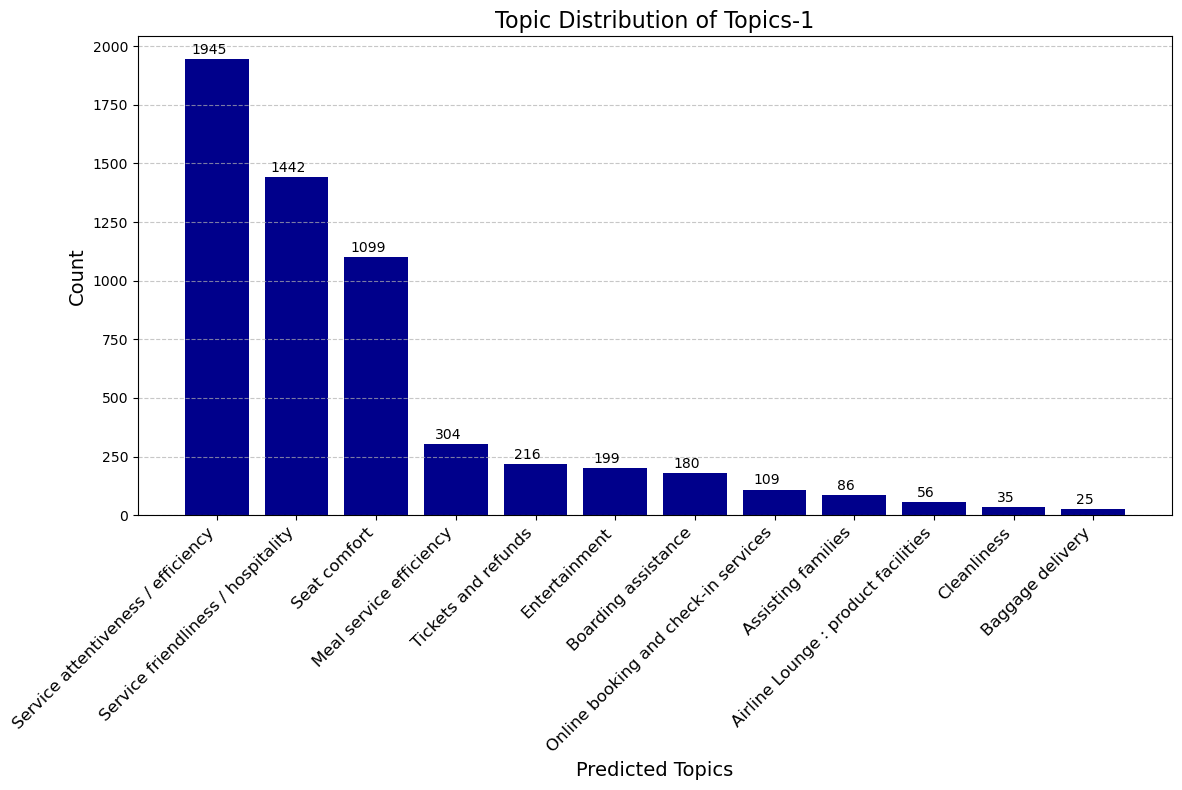

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'zero_shot_classified_topic_minus_one_fixed.csv'
df = pd.read_csv(file_path)

# Get the count of predicted topics
topic_counts = df['predicted_topic'].value_counts()

# Create the bar chart with topic counts
plt.figure(figsize=(12, 8))
bars = plt.bar(topic_counts.index, topic_counts.values, color='darkblue')

# Add the count labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 10,
             str(bar.get_height()), ha='center', va='bottom')

# Customize the chart
plt.title('Topic Distribution of Topics-1', fontsize=16)
plt.xlabel('Predicted Topics', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


## Topic Visualization Mapping with Skytrax Criteria

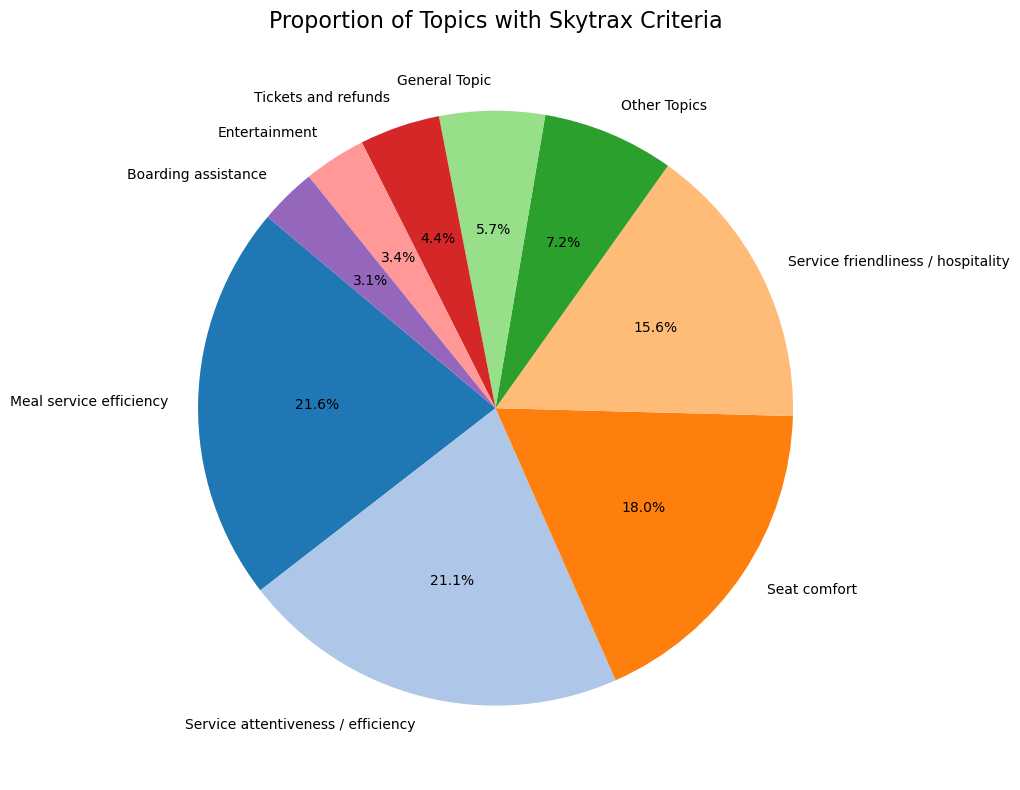

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
all_topics = pd.read_csv('all_topics_per_phase_sentiment.csv')

# Aggregate data to calculate the total count of each topic across all phases and sentiments
topic_proportions = all_topics.groupby('mapped_topic')['Count'].sum().reset_index()

# Calculate total reviews
total_reviews = topic_proportions['Count'].sum()

# Add a percentage column
topic_proportions['Percentage'] = (topic_proportions['Count'] / total_reviews) * 100

# Group topics with less than 2% into "Other Topics"
topic_proportions['mapped_topic'] = topic_proportions.apply(
    lambda row: row['mapped_topic'] if row['Percentage'] >= 2 else 'Other Topics', axis=1
)

# Recalculate counts and percentages after grouping
grouped_proportions = topic_proportions.groupby('mapped_topic', as_index=False).agg(
    Count=('Count', 'sum'),
    Percentage=('Percentage', 'sum')
)

# Sort by count for better visualization
grouped_proportions = grouped_proportions.sort_values(by='Count', ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    grouped_proportions['Count'], 
    labels=grouped_proportions['mapped_topic'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab20.colors
)
plt.title('Proportion of Topics with Skytrax Criteria', fontsize=16)
plt.tight_layout()
plt.savefig('pie_chart_topic_proportions_with_other.png')
plt.show()

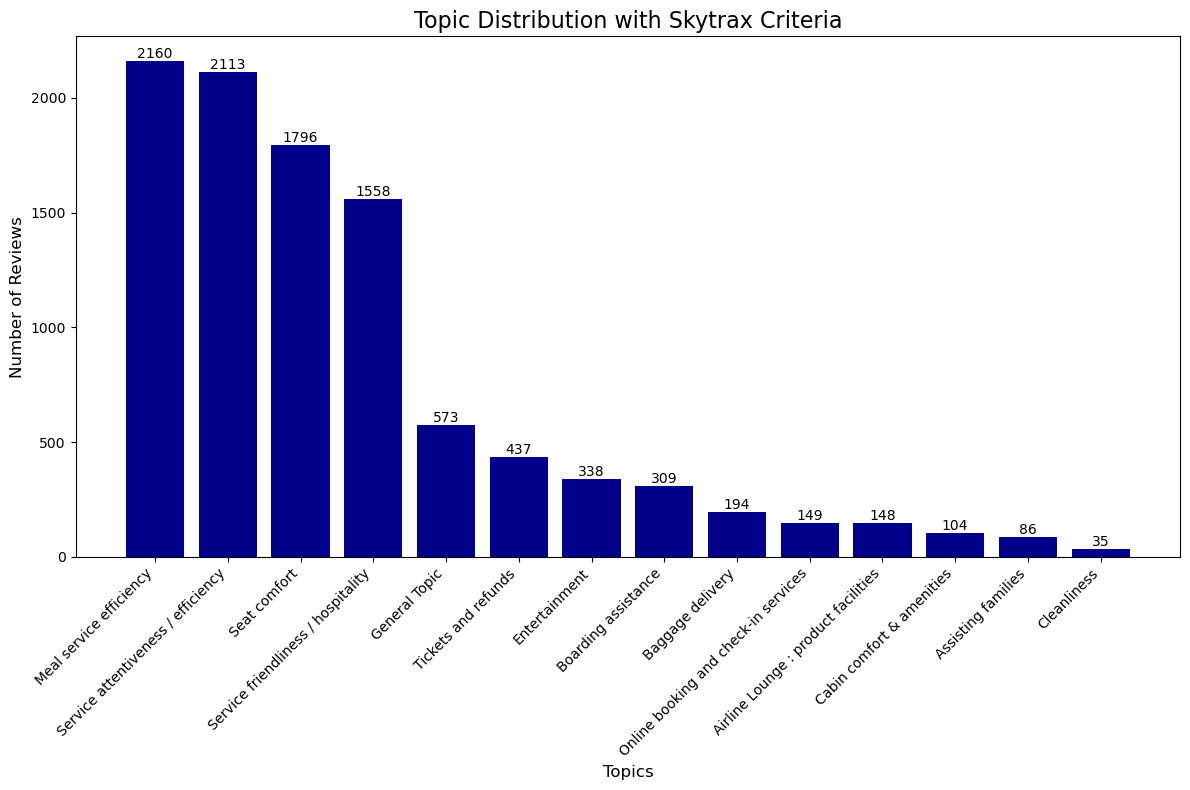

In [3]:
# Reload the dataset to ensure correct columns are present
all_topics = pd.read_csv('all_topics_per_phase_sentiment.csv')

# Aggregate data to calculate the total count of each topic across all phases and sentiments
topic_proportions = all_topics.groupby('mapped_topic')['Count'].sum().reset_index()

# Calculate total reviews
total_reviews = topic_proportions['Count'].sum()

# Add a percentage column
topic_proportions['Percentage'] = (topic_proportions['Count'] / total_reviews) * 100

# Exclude "General Topics"
topic_proportions = topic_proportions[topic_proportions['mapped_topic'] != 'General Topics']

# Sort data by count in descending order
topic_counts_sorted = topic_proportions.sort_values(by='Count', ascending=False)

# Create bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(
    topic_counts_sorted['mapped_topic'],
    topic_counts_sorted['Count'],
    color='darkblue'
)

# Add count labels on bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        str(int(bar.get_height())),
        ha='center',
        va='bottom',
        fontsize=10
    )

# Customize chart
plt.title('Topic Distribution with Skytrax Criteria', fontsize=16)
plt.xlabel('Topics', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show chart
plt.show()


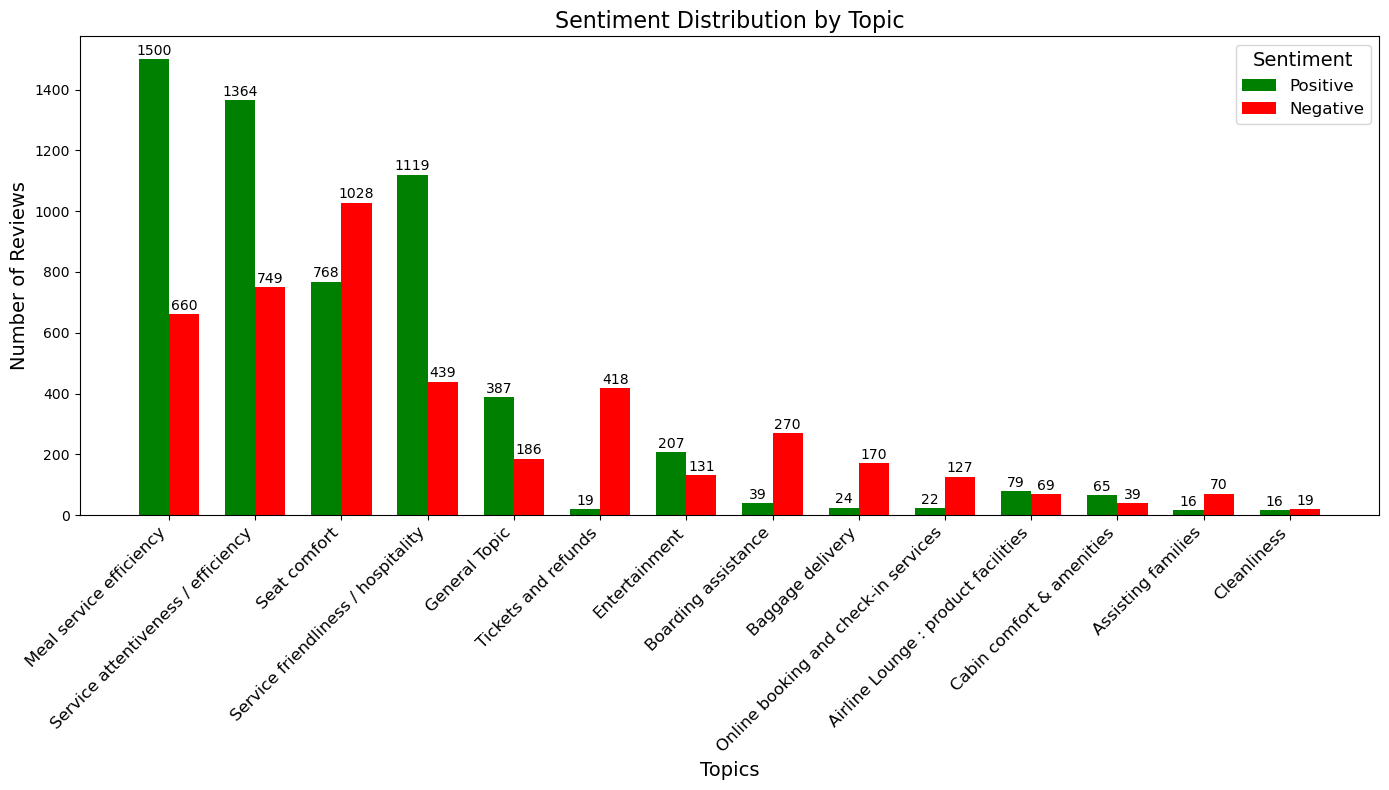

In [4]:
# Aggregate data to ensure unique 'mapped_topic' and 'sentiment' pairs
filtered_data = all_topics[all_topics['mapped_topic'] != 'General Topics']
aggregated_data = filtered_data.groupby(['mapped_topic', 'sentiment'])['Count'].sum().reset_index()

# Create pivot table
filtered_pivot = aggregated_data.pivot(index='mapped_topic', columns='sentiment', values='Count').fillna(0)
filtered_pivot['Total_Count'] = filtered_pivot.sum(axis=1)
filtered_pivot = filtered_pivot.sort_values(by='Total_Count', ascending=False).reset_index()

# Prepare the data
topic_sentiment_filtered_df = filtered_pivot

# Plot grouped bar chart for sentiment analysis
plt.figure(figsize=(14, 8))
topics_filtered = topic_sentiment_filtered_df['mapped_topic']
bar_width = 0.35
x_indices_filtered = range(len(topics_filtered))

# Plot bars for positive and negative sentiment
plt.bar(
    [x - bar_width / 2 for x in x_indices_filtered], 
    topic_sentiment_filtered_df['positive'], 
    width=bar_width, 
    color='green', 
    label='Positive'
)

plt.bar(
    [x + bar_width / 2 for x in x_indices_filtered], 
    topic_sentiment_filtered_df['negative'], 
    width=bar_width, 
    color='red', 
    label='Negative'
)

# Add labels, title, and legend
plt.xlabel('Topics', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.title('Sentiment Distribution by Topic', fontsize=16)
plt.xticks(x_indices_filtered, topics_filtered, rotation=45, ha='right', fontsize=12)
plt.legend(title='Sentiment', fontsize=12, title_fontsize=14)
plt.tight_layout()

# Add numbers on the bars
for i, topic in enumerate(topics_filtered):
    # Positive bar numbers
    plt.text(
        i - bar_width / 2, 
        topic_sentiment_filtered_df['positive'][i] + 5, 
        f"{int(topic_sentiment_filtered_df['positive'][i])}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )
    # Negative bar numbers
    plt.text(
        i + bar_width / 2, 
        topic_sentiment_filtered_df['negative'][i] + 5, 
        f"{int(topic_sentiment_filtered_df['negative'][i])}", 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )

# Show sentiment distribution chart
plt.show()


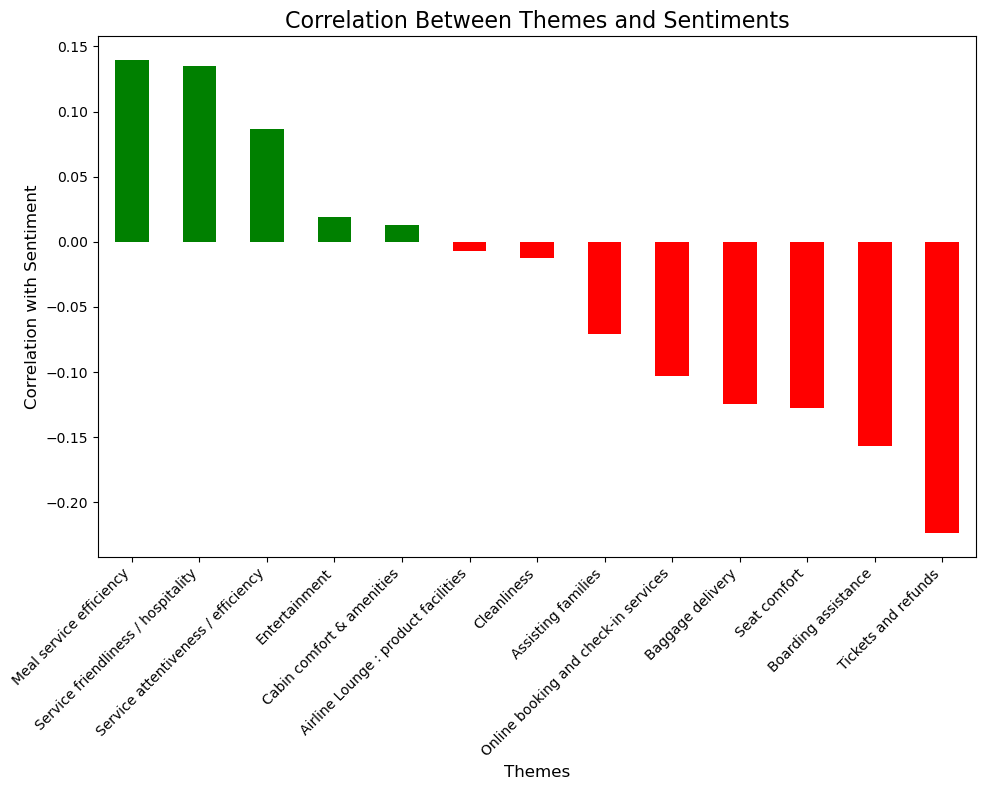

Meal service efficiency                 0.139608
Service friendliness / hospitality      0.134859
Service attentiveness / efficiency      0.086630
Entertainment                           0.018824
Cabin comfort & amenities               0.012916
Airline Lounge : product facilities    -0.007095
Cleanliness                            -0.012587
Assisting families                     -0.070678
Online booking and check-in services   -0.102847
Baggage delivery                       -0.124411
Seat comfort                           -0.127218
Boarding assistance                    -0.157042
Tickets and refunds                    -0.223655
Name: sentiment_numeric, dtype: float64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'final_mapped_topics_results.csv'
data = pd.read_csv(file_path)

# Convert sentiment to numerical values
data['sentiment_numeric'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else -1 if x == 'negative' else 0)

# One-hot encode the 'mapped_topic' column
one_hot_topics = pd.get_dummies(data['mapped_topic'])

# Combine one-hot encoded topics with sentiment for correlation analysis
correlation_data = pd.concat([one_hot_topics, data['sentiment_numeric']], axis=1)

# Drop the "General Topic" column if present
if 'General Topic' in one_hot_topics.columns:
    correlation_data = correlation_data.drop(columns=['General Topic'])

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Extract correlations between themes and sentiment
theme_sentiment_correlation = correlation_matrix['sentiment_numeric'].drop('sentiment_numeric').sort_values(ascending=False)

# Plot correlation as a bar chart
plt.figure(figsize=(10, 8))
theme_sentiment_correlation.plot(kind='bar', color=theme_sentiment_correlation.apply(lambda x: 'green' if x > 0 else 'red'))
plt.title('Correlation Between Themes and Sentiments', fontsize=16)
plt.xlabel('Themes', fontsize=12)
plt.ylabel('Correlation with Sentiment', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('theme_sentiment_correlation.png')
plt.show()

# Display the correlation data for reference
print(theme_sentiment_correlation)